# Organización y división: Perros

req: tensorflow matplotlib scipy

In [40]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir_dog = "dog_skin_disease_split" 
img_height, img_width = 224, 224
batch_size = 32

# Generador de entrenamiento
train_datagen_dog = ImageDataGenerator(
    rescale=1./255, #normalizacion
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

# Generador de validación y prueba
# Normalización (escala de 0 a 1)
val_test_datagen_dog = ImageDataGenerator(rescale=1./255) 

# Usamos el generador de validacion como base para extraer la informacion

# Conjunto de entrenamiento (para obtener las clases)
train_generator_dog = train_datagen_dog.flow_from_directory(
    directory=base_dir_dog + '/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Conjunto de validacion
val_generator_dog = val_test_datagen_dog.flow_from_directory(
    directory=base_dir_dog + '/valid',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Conjunto de prueba 
test_generator_dog = val_test_datagen_dog.flow_from_directory(
    directory=base_dir_dog + '/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False 
)

print("\n ORGANIZACION DEL DATASET DE PERROS")
print(f"Ruta de la base de datos: {base_dir_dog}")
print("\nClases detectadas (Etiqueta numerica asignada a cada carpeta de enfermedad):")
print(train_generator_dog.class_indices)
print("\nConteo de imagenes por conjunto (split):")
print(f"Cantidad train: {train_generator_dog.samples}")
print(f"Cantidad valid: {val_generator_dog.samples}")
print(f"Cantidad test: {test_generator_dog.samples}")

Found 3022 images belonging to 6 classes.
Found 860 images belonging to 6 classes.
Found 433 images belonging to 6 classes.

 ORGANIZACION DEL DATASET DE PERROS
Ruta de la base de datos: dog_skin_disease_split

Clases detectadas (Etiqueta numerica asignada a cada carpeta de enfermedad):
{'Dermatitis': 0, 'Fungal_infections': 1, 'Healthy': 2, 'Hypersensitivity': 3, 'demodicosis': 4, 'ringworm': 5}

Conteo de imagenes por conjunto (split):
Cantidad train: 3022
Cantidad valid: 860
Cantidad test: 433


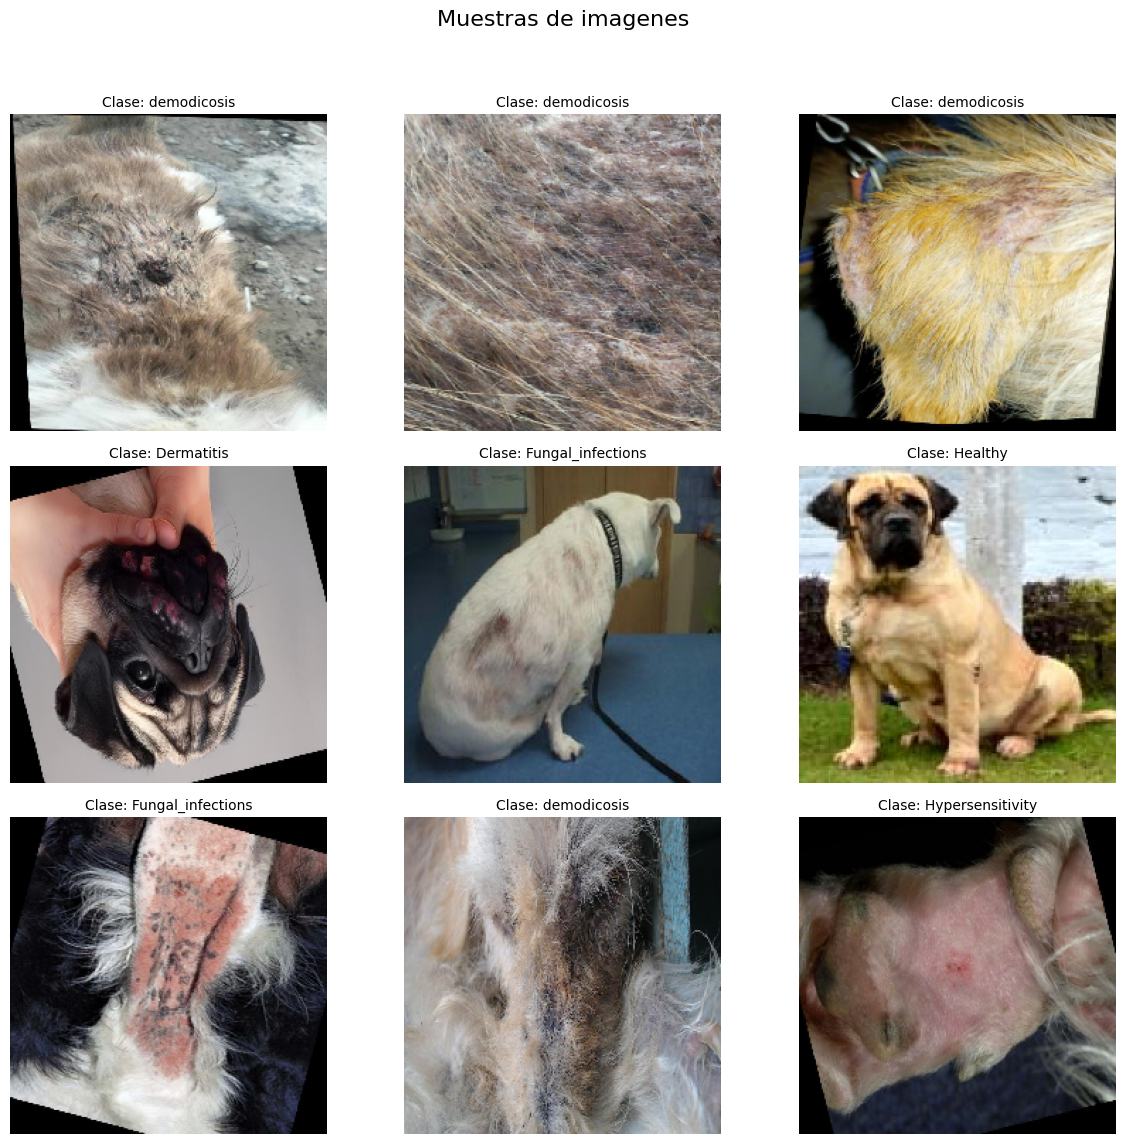

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener un batch de imagenes y etiquetas del conjunto de entrenamiento
x_batch, y_batch = next(train_generator_dog)

# Mapeo de indices a nombres de clase para la etiqueta
class_labels = list(train_generator_dog.class_indices.keys())

plt.figure(figsize=(12, 12))
plt.suptitle("Muestras de imagenes", fontsize=16)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    
    class_index = np.argmax(y_batch[i]) 
    
    # Obtiene el nombre de la enfermedad usando el indice
    label = class_labels[class_index]
    
    plt.imshow(x_batch[i])
    plt.title(f"Clase: {label}", fontsize=10)
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Organización y división: Gatos

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir_cat = "cat_skin_disease_split"  
img_height, img_width = 224, 224
batch_size = 32

# Generador de entrenamiento
train_datagen_cat = ImageDataGenerator(
    rescale=1./255, #normalizacion
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

# Generador de validación y prueba
# normalizacion (escala de 0 a 1)
val_test_datagen_cat = ImageDataGenerator(rescale=1./255) 

train_generator_cat = train_datagen_cat.flow_from_directory(
    directory=base_dir_cat + '/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator_cat = val_test_datagen_cat.flow_from_directory(
    directory=base_dir_cat + '/valid',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator_cat = val_test_datagen_cat.flow_from_directory(
    directory=base_dir_cat + '/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print("\n ORGANIZACION DEL DATASET DE GATOS")
print(f"Ruta de la base de datos: {base_dir_cat}")
print("\nClases detectadas (Etiqueta numerica asignada a cada carpeta de enfermedad):")
print(train_generator_cat.class_indices)
print("\nConteo de imagenes por conjunto (Split):")
print(f"Cantidad train: {train_generator_cat.samples}")
print(f"Cantidad valid: {val_generator_cat.samples}")
print(f"Cantidad test: {test_generator_cat.samples}")

Found 699 images belonging to 4 classes.
Found 199 images belonging to 4 classes.
Found 101 images belonging to 4 classes.

 ORGANIZACION DEL DATASET DE GATOS
Ruta de la base de datos: cat_skin_disease_split

Clases detectadas (Etiqueta numérica asignada a cada carpeta de enfermedad):
{'Flea_Allergy': 0, 'Health': 1, 'Ringworm': 2, 'Scabies': 3}

Conteo de imágenes por conjunto (Split):
Cantidad train: 699
Cantidad valid: 199
Cantidad test: 101


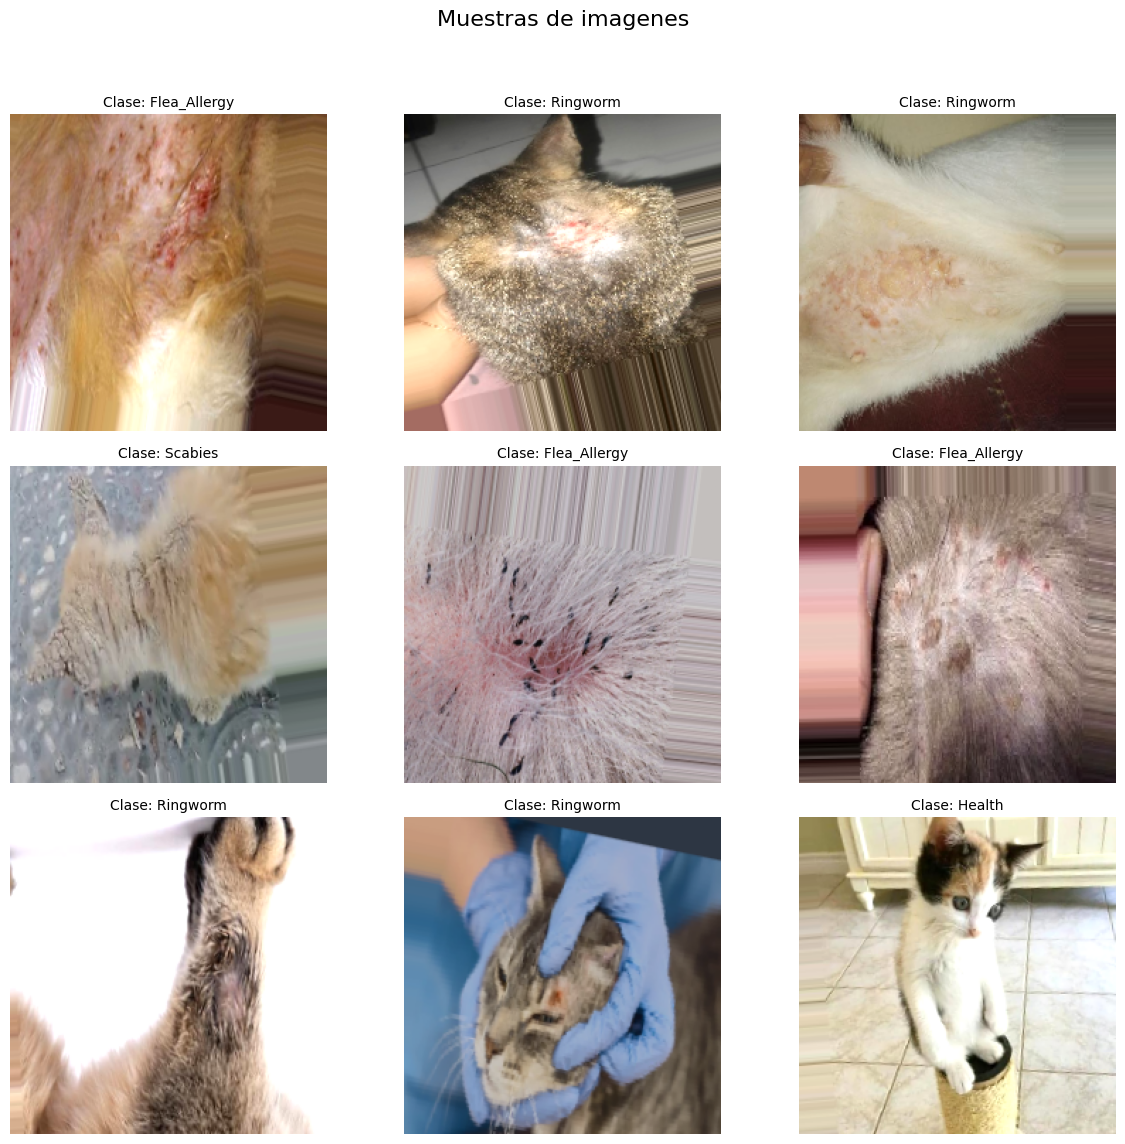

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener un batch de imágenes y etiquetas del conjunto de entrenamiento
x_batch_cat, y_batch_cat = next(train_generator_cat)

# Mapeo de índices a nombres de clase
class_labels_cat = list(train_generator_cat.class_indices.keys())

plt.figure(figsize=(12, 12))
plt.suptitle("Muestras de imagenes", fontsize=16)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    
    # Convierte la matriz one-hot a un indice 
    class_index = np.argmax(y_batch_cat[i]) 
    
    # Obtiene el nombre de la enfermedad usando el indice
    label = class_labels_cat[class_index]
    
    plt.imshow(x_batch_cat[i])
    plt.title(f"Clase: {label}", fontsize=10)
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()